<a href="https://colab.research.google.com/github/KhalandarMokula/GRIP-TheSparkFoundation-Internship/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME: MOKULA SAI KHALANDAR**

# Graduate Rotational Internship Program :The Sparks Foundation #GRIPJULY21 


#TASK2 :Prediction using Unsupervised ML
**In this task we will learn how to use Scikit-learn's KMeans Clustering to classify the Iris Dataset into Its Species Iris-Setosa, Iris-Versicolor and Iris-Virginica respectively.**

In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving Iris.csv to Iris (3).csv


{'Iris.csv': b'Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species\n1,5.1,3.5,1.4,0.2,Iris-setosa\n2,4.9,3.0,1.4,0.2,Iris-setosa\n3,4.7,3.2,1.3,0.2,Iris-setosa\n4,4.6,3.1,1.5,0.2,Iris-setosa\n5,5.0,3.6,1.4,0.2,Iris-setosa\n6,5.4,3.9,1.7,0.4,Iris-setosa\n7,4.6,3.4,1.4,0.3,Iris-setosa\n8,5.0,3.4,1.5,0.2,Iris-setosa\n9,4.4,2.9,1.4,0.2,Iris-setosa\n10,4.9,3.1,1.5,0.1,Iris-setosa\n11,5.4,3.7,1.5,0.2,Iris-setosa\n12,4.8,3.4,1.6,0.2,Iris-setosa\n13,4.8,3.0,1.4,0.1,Iris-setosa\n14,4.3,3.0,1.1,0.1,Iris-setosa\n15,5.8,4.0,1.2,0.2,Iris-setosa\n16,5.7,4.4,1.5,0.4,Iris-setosa\n17,5.4,3.9,1.3,0.4,Iris-setosa\n18,5.1,3.5,1.4,0.3,Iris-setosa\n19,5.7,3.8,1.7,0.3,Iris-setosa\n20,5.1,3.8,1.5,0.3,Iris-setosa\n21,5.4,3.4,1.7,0.2,Iris-setosa\n22,5.1,3.7,1.5,0.4,Iris-setosa\n23,4.6,3.6,1.0,0.2,Iris-setosa\n24,5.1,3.3,1.7,0.5,Iris-setosa\n25,4.8,3.4,1.9,0.2,Iris-setosa\n26,5.0,3.0,1.6,0.2,Iris-setosa\n27,5.0,3.4,1.6,0.4,Iris-setosa\n28,5.2,3.5,1.5,0.2,Iris-setosa\n29,5.2,3.4,1.4,0.2,Iris-setosa\n

In [ ]:
df = pd.read_csv('Iris.csv')

In [ ]:
df.drop('Id',axis=1,inplace=True)

**DATA ANALYSIS**

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
sns.set_style('darkgrid')

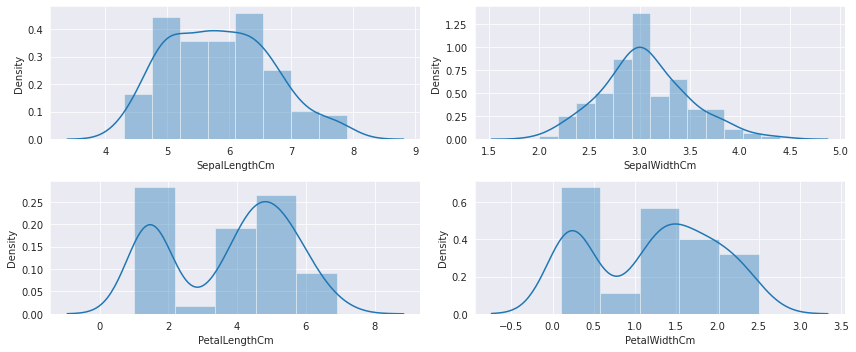

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(2,2,1)
sns.distplot(df['SepalLengthCm'])
plt.subplot(2,2,2)
sns.distplot(df['SepalWidthCm'])
plt.subplot(2,2,3)
sns.distplot(df['PetalLengthCm'])
plt.subplot(2,2,4)
sns.distplot(df['PetalWidthCm'])
plt.tight_layout()

**Distributions looks to be lightly skewed except for SepalWidthCm lets check for the amount of skewness.**

In [56]:
print("SepalLength: ",df['SepalLengthCm'].skew())
print("SepalWidth: ",df['SepalWidthCm'].skew())
print("PetalLength: ",df['PetalLengthCm'].skew())
print("PetalWidth: ",df['PetalWidthCm'].skew())

SepalLength:  0.27841730000040843
SepalWidth:  0.14081170828794973
PetalLength:  -0.32364863848096104
PetalWidth:  -0.14877741796208035


**Observation: As the Value of skewness is in between -0.5 and 0.5 the Distribution is fairly Symmetrical (lightly skewed) .So, we proceed to train our model with this data without need of any transformation.**

**Plots of SepalLength vs SepalWidth**

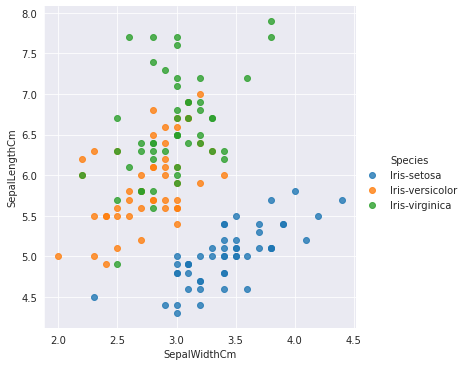

In [ ]:
sns.lmplot(x='SepalWidthCm',y = 'SepalLengthCm',data=df,hue='Species',fit_reg=False)

**Observation:**\
Iris-setosa class  have nearly same SepalLength and SepalWidth, its maximum SepalWidth is the relatively largest of rest 2 classes.\
Iris-versicolor class  have more SepalLength than SepalWidth.\
Iris-virginica class have SepalLength  more in comparision with SepalWidth and its maximum SepalLength is the largest of the rest 2 classes.

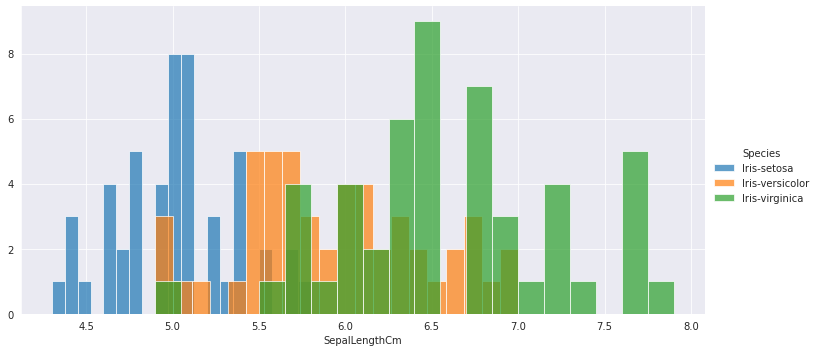

In [ ]:
g = sns.FacetGrid(df,hue='Species',height=5,aspect=2)
g.map(plt.hist,'SepalLengthCm',bins=20,alpha=0.7).add_legend()

**Observation:**

Most of the observations of respective Sepcies fall in the following ranges of SepalLengthCm :
*   IrisSetosa : 4.8 cm to 5.5 cm
*   IrisVersicolor : 5.4 cm to 6.2cm
*   IrisVirginica : 6.4 cm to 6.8 cm





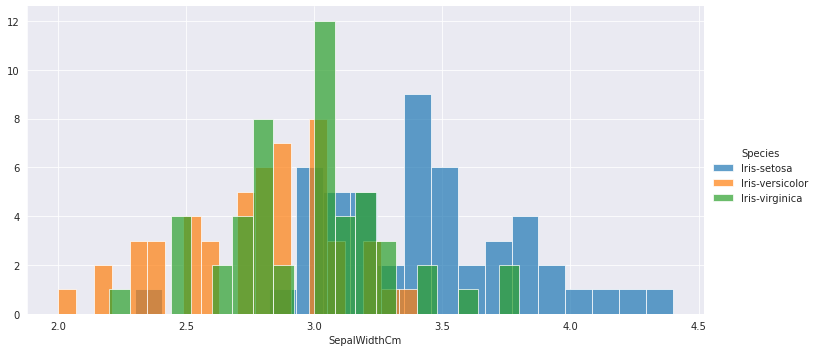

In [ ]:
g = sns.FacetGrid(df,hue='Species',height=5,aspect=2)
g.map(plt.hist,'SepalWidthCm',bins=20,alpha=0.7).add_legend()

**Observation**
Most of the observations of respective Sepcies fall in the following ranges of SepalWidthCm :
*   IrisSetosa : 3.4 cm to 3.5 cm
*   IrisVersicolor : 2.6 cm and 3 cm
*   IrisVirginica : 2.8 cm to 3.1 cm




**Plots of PetalLength Vs PetalWidth**

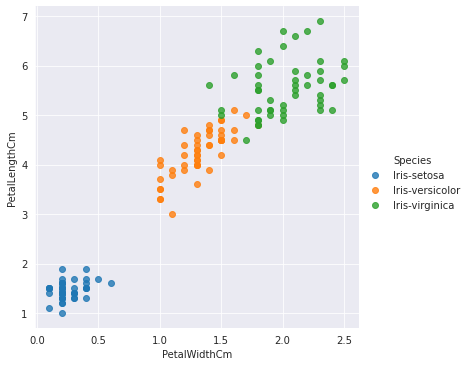

In [ ]:
sns.lmplot(x='PetalWidthCm',y = 'PetalLengthCm',data=df,hue='Species',fit_reg=False)

**Observation:**


>
*    Flowers with Higher PetalWidth and PetalLength belongs to Iris-Virginica Species and its PetalLength > PetalWidth.
*  Flowers with PetalWidth ranging between 1 to 1.7 and PetalLength ranging between 3 to 5.1 belongs to Iris-Versicolor.
*   Flowers with least PetalWidth(between 0 to 0.6) and PetalLenght(between 1 to 2) belongs to Iris-Setosa Species.






 
 



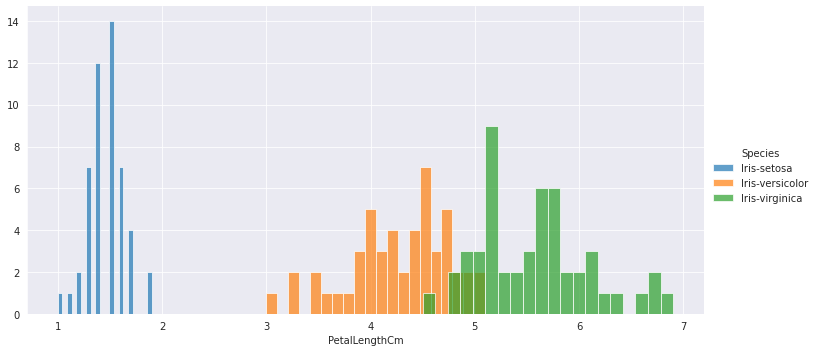

In [ ]:
g = sns.FacetGrid(df,hue='Species',height=5,aspect=2)
g.map(plt.hist,'PetalLengthCm',bins=20,alpha=0.7).add_legend()

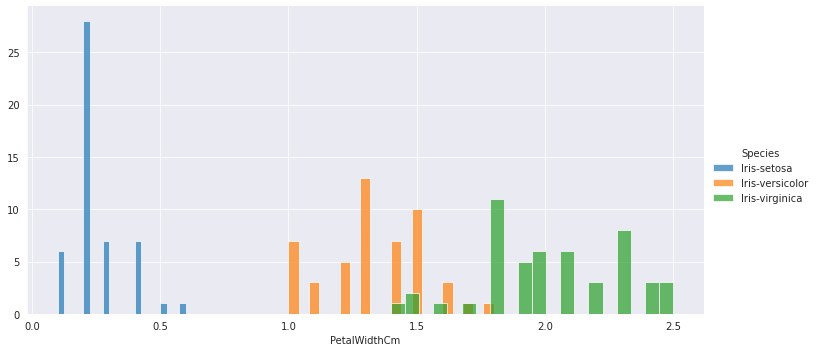

In [ ]:
g = sns.FacetGrid(df,hue='Species',height=5,aspect=2)
g.map(plt.hist,'PetalWidthCm',bins=20,alpha=0.7).add_legend()

**Observation:**\
We can clearly see that Petal Width and Petal Length makes fair distinction among the Species.

**Checking for Outliers in the data**

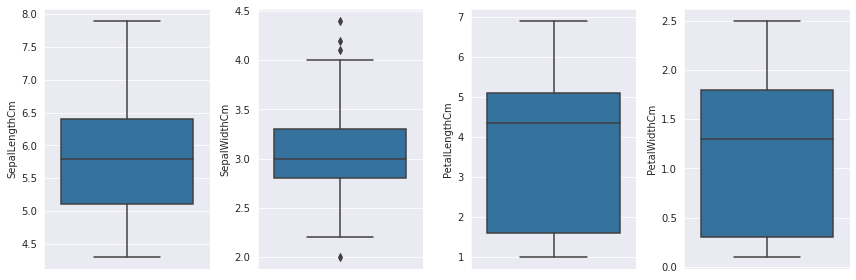

In [ ]:
#creating subplots in a single row.
fig,axs = plt.subplots(nrows=1,ncols=4,figsize=(12,4))
#position, to specify where to plot in the subplots axes created above,
index = 0
for k,v in df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].items():
  #Plotting Boxplot, 
  sns.boxplot(y=k,data=df,ax=axs[index],saturation=0.7)
  index+=1
plt.tight_layout()

**We can see that except for SepalWidthCm rest of colums are free of outliers.**

In [ ]:
#25th percentile
q1 = df['SepalWidthCm'].quantile(0.25)
#75th percentile
q3 = df['SepalWidthCm'].quantile(0.75)
#inter quartile range.
iqr = q3 - q1
print("Outliers location is below",q1 - 1.5 * iqr ,"and above",q3 + 1.5 * iqr)

Outliers location is below 2.05 and above 4.05


In [ ]:
df[df['SepalWidthCm']<=2.05]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
60,5.0,2.0,3.5,1.0,Iris-versicolor


In [ ]:
df[df['SepalWidthCm']>=4.05 ]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa


We will drop these rows 15, 32, 33 and 60 from the dataset.

In [ ]:
df.drop([15,32,33,60],axis=0,inplace=True)

**KMeans Clustering**

**In general KMeans Clustering is used for Unsupervised Learning i.e. the data does not contain a dependent variable 'Sepcies' in this case.So,we do not know wheather to classify the data into 3, 4 or 5 or some n number of clusters. We train the KMeans algorithm on the data to classify the data into different Species.\
So we now try to find the best possible number of clusters to the data using the Elbow method.**

In [ ]:
#Data on which model is to be trained.
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#Sum of squared distances of samples to their closest cluster center.
cost = [] #wcss
for i in range(1,15):
  #instantiating the model.
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42,n_init=20)
  #fitting  the model on the data.
  kmeans.fit(X)
  cost.append(kmeans.inertia_)


Text(0, 0.5, 'WCSS COST')

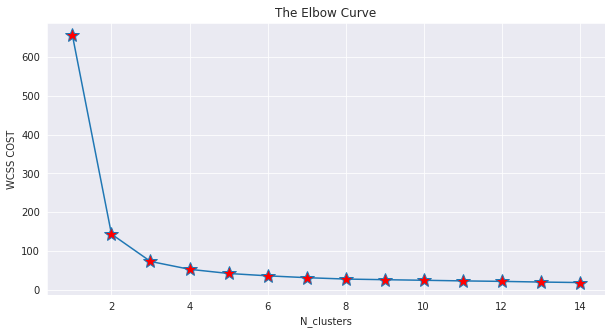

In [55]:
plt.figure(figsize=(10,5))
plt.plot(range(1,15,1),cost,marker="*",markersize=15,markerfacecolor='red')
plt.title("The Elbow Curve")
plt.xlabel("N_clusters")
plt.ylabel("WCSS COST")

We can clearly see that beyond n_clusters=3 the Kmean algorithm's performance has not imporved much. Hence n_clusters=3 is the optimum number for n_clusters. The reason why this is called as Elbow method is that at the optimum clusters the curve takes the form of Elbow.

**Now we train the KMeans model on 3 clusters**

In [ ]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=42,n_init=10)

In [ ]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
kmeans.cluster_centers_

array([[4.97659574, 3.36595745, 1.46382979, 0.24468085],
       [5.91639344, 2.76065574, 4.40819672, 1.44098361],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [ ]:
#labels assignned by KMeans to each sample.
y_pred=kmeans.labels_

In [51]:
print("wcss: ",kmeans.inertia_)

wcss:  73.51656472013659


In [ ]:
#function to make Numerical Column of Categeroical Column Species.
def covert_to_numerical(species):
  if species=="Iris-setosa":
    return 0
  elif species=="Iris-versicolor":
    return 1
  else:
    return 2

In [ ]:
#using apply method to column Species to create a numerical column Clusters of it.
df['Cluster'] = df['Species'].apply(covert_to_numerical)

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


 **True vs KMeans Clusters on SepalLength and SepalWidth**

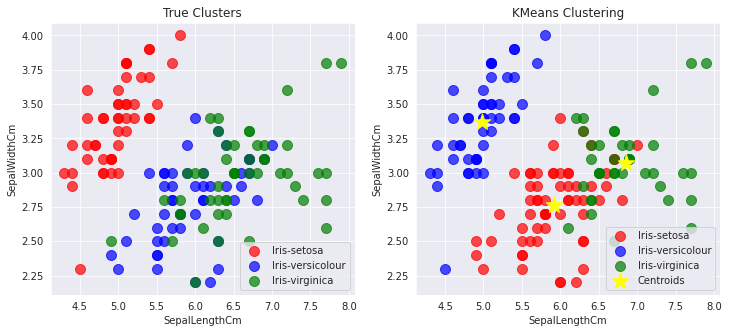

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
#Scatter plot of column 0 and 1 using Original class .
plt.scatter(X[df['Cluster'] == 0, 0], X[df['Cluster'] == 0, 1], s = 100, c = 'red',alpha=0.7, label = 'Iris-setosa')
plt.scatter(X[df['Cluster']==1, 0], X[df['Cluster']==1, 1], s = 100, c = 'blue',alpha=0.7, label = 'Iris-versicolour')
plt.scatter(X[df['Cluster']==2, 0], X[df['Cluster'] == 2, 1],s = 100, c = 'green',alpha=0.7, label = 'Iris-virginica')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title("True Clusters")
plt.legend()
plt.subplot(1,2,2)
#Scatter plot of column 0 and 1 using KMeans assigned class .
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'red', alpha=0.7,label = 'Iris-setosa')
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'blue',alpha=0.7, label = 'Iris-versicolour')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1],s = 100, c = 'green',alpha=0.7, label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids',marker='*')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title("KMeans Clustering")
plt.legend()

**True vs KMeans Clusters on PetalLength vs PetalWidth**

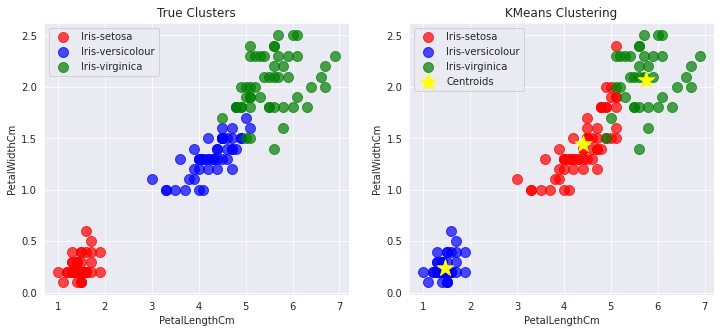

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
#Scatter plot of column 2 and 3 using Original class .
plt.scatter(X[df['Cluster'] == 0, 2], X[df['Cluster'] == 0, 3], s = 100, c = 'red', alpha=0.7, label = 'Iris-setosa')
plt.scatter(X[df['Cluster']==1, 2], X[df['Cluster']==1, 3], s = 100, c = 'blue', alpha=0.7,label = 'Iris-versicolour')
plt.scatter(X[df['Cluster']==2, 2], X[df['Cluster'] == 2, 3],s = 100, c = 'green',alpha=0.7, label = 'Iris-virginica')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.title("True Clusters")
plt.legend()
plt.subplot(1,2,2)
#Scatter plot of column 2 and 3 using KMeans assigned class .
plt.scatter(X[y_pred == 1, 2], X[y_pred == 1, 3], s = 100, c = 'red',alpha=0.7, label = 'Iris-setosa')
plt.scatter(X[y_pred == 0, 2], X[y_pred == 0, 3], s = 100, c = 'blue',alpha=0.7, label = 'Iris-versicolour')
plt.scatter(X[y_pred == 2, 2], X[y_pred == 2, 3],s = 100, c = 'green',alpha=0.7, label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],s=300,c='yellow',alpha=1,label='Centroids',marker='*')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.title("KMeans Clustering")
plt.legend()


**True vs KMeans Clusters on SepalLength vs PetalLength**

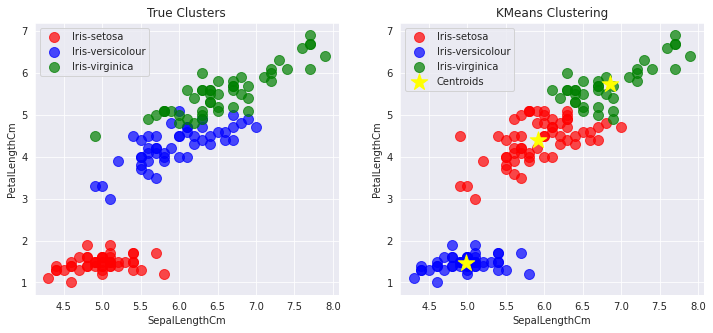

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
#Scatter plot of column 0 and 3 using Original class .
plt.scatter(X[df['Cluster'] == 0, 0], X[df['Cluster'] == 0, 2], s = 100, c = 'red',alpha=0.7, label = 'Iris-setosa')
plt.scatter(X[df['Cluster']==1, 0], X[df['Cluster']==1, 2], s = 100, c = 'blue',alpha=0.7, label = 'Iris-versicolour')
plt.scatter(X[df['Cluster']==2, 0], X[df['Cluster'] == 2, 2],s = 100, c = 'green',alpha=0.7, label = 'Iris-virginica')
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.title("True Clusters")
plt.legend()
plt.subplot(1,2,2)
#Scatter plot of column 0 and 2 using KMeans assigned class .
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 2], s = 100, c = 'red', alpha=0.7,label = 'Iris-setosa')
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 2], s = 100, c = 'blue',alpha=0.7, label = 'Iris-versicolour')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 2],s = 100, c = 'green',alpha=0.7, label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,2],s=300,c='yellow',label='Centroids',marker='*')
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.title("KMeans Clustering")
plt.legend()


**True vs KMeans Clusters on SepalWidth vs PetalWidth**

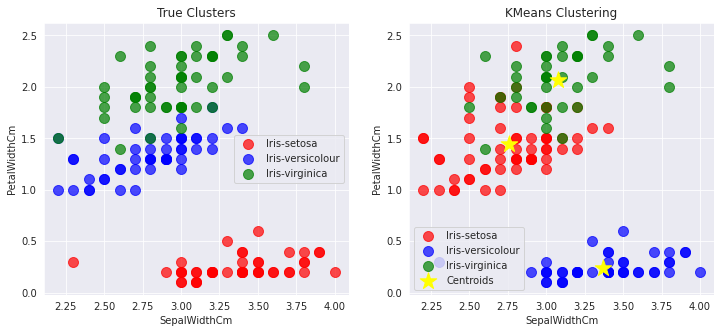

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
#Scatter plot of column 1 and 3 using Original class .
plt.scatter(X[df['Cluster'] == 0, 1], X[df['Cluster'] == 0, 3], s = 100, c = 'red',alpha=0.7, label = 'Iris-setosa')
plt.scatter(X[df['Cluster']==1, 1], X[df['Cluster']==1, 3], s = 100, c = 'blue',alpha=0.7, label = 'Iris-versicolour')
plt.scatter(X[df['Cluster']==2, 1], X[df['Cluster'] == 2, 3],s = 100, c = 'green',alpha=0.7, label = 'Iris-virginica')
plt.xlabel('SepalWidthCm')
plt.ylabel('PetalWidthCm')
plt.title("True Clusters")
plt.legend()
plt.subplot(1,2,2)
#Scatter plot of column 1 and 3 using KMeans assigned class .
plt.scatter(X[y_pred == 1, 1], X[y_pred == 1, 3], s = 100, c = 'red', alpha=0.7,label = 'Iris-setosa')
plt.scatter(X[y_pred == 0, 1], X[y_pred == 0, 3], s = 100, c = 'blue',alpha=0.7, label = 'Iris-versicolour')
plt.scatter(X[y_pred == 2, 1], X[y_pred == 2, 3],s = 100, c = 'green',alpha=0.7, label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,3],s=300,c='yellow',label='Centroids',marker='*')
plt.xlabel('SepalWidthCm')
plt.ylabel('PetalWidthCm')
plt.title("KMeans Clustering")
plt.legend()




In [ ]:
pd.DataFrame({"True":df['Cluster'].values,"Pred":y_pred})

,True,Pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
141,2,2
142,2,1
143,2,2
144,2,2


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
print(confusion_matrix(df['Cluster'],y_pred))
print(classification_report(df['Cluster'],y_pred))

[[47  0  0]
 [ 0 47  2]
 [ 0 14 36]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       0.77      0.96      0.85        49
           2       0.95      0.72      0.82        50

    accuracy                           0.89       146
   macro avg       0.91      0.89      0.89       146
weighted avg       0.90      0.89      0.89       146



#Thank You :)